# Logistic Regression on Breast Cancer Dataset


## Introduction

In this notebook, I apply **Logistic Regression** to the Breast Cancer dataset from `scikit-learn`.  
This dataset is commonly used for binary classification tasks, where the goal is to predict whether 
a tumor is **malignant** (cancerous) or **benign** (non-cancerous). Logistic Regression is a simple yet 
powerful linear model that outputs probabilities and is well-suited for this type of problem.


In [31]:
import os
import joblib
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_auc_score, RocCurveDisplay


## Exploring Data
**The Breast Cancer dataset from scikit-learn is already cleaned, but I still have to make some visualizations to confirm that**

In [32]:
# Load dataset
cancer = load_breast_cancer()

# Features
features = pd.DataFrame(cancer.data, columns=cancer.feature_names)
# Add target as a new column
features["target"] = cancer.target

features.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [33]:
#Show dataset info
features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

## Preprocessing
Visualizing missing values using Heatmap.

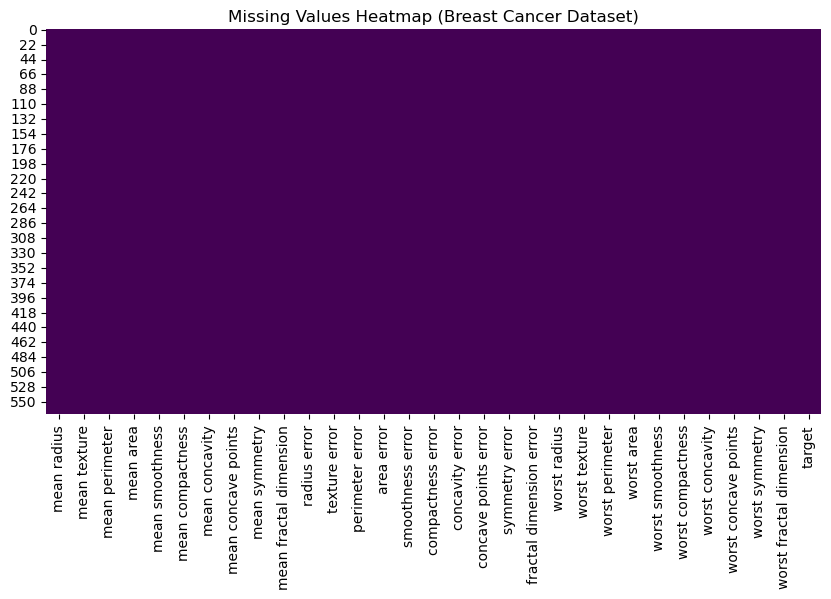

In [34]:
#Check for Missing Values
plt.figure(figsize=(10,5))
sns.heatmap(features.isnull(), cbar=False, cmap="viridis")
plt.title("Missing Values Heatmap (Breast Cancer Dataset)")
plt.show()

From the above diagram which shows a clean heatmap (no yellow gaps), this proves there are no missing values.

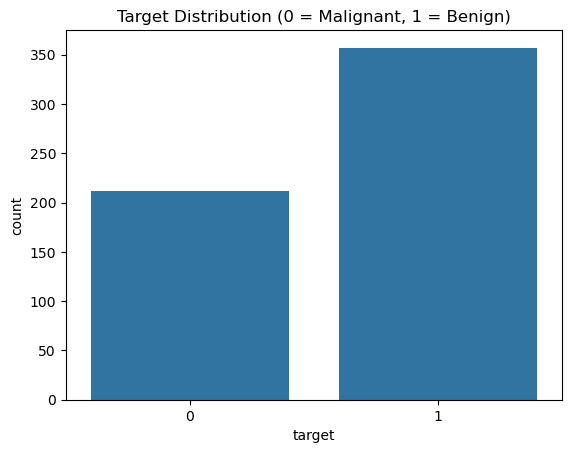

In [35]:
sns.countplot(x="target", data=features)
plt.title("Target Distribution (0 = Malignant, 1 = Benign)")
plt.show()


**The plot above confirms I have both classes represented and that the dataset is reasonably balanced**

## Feature Distributions

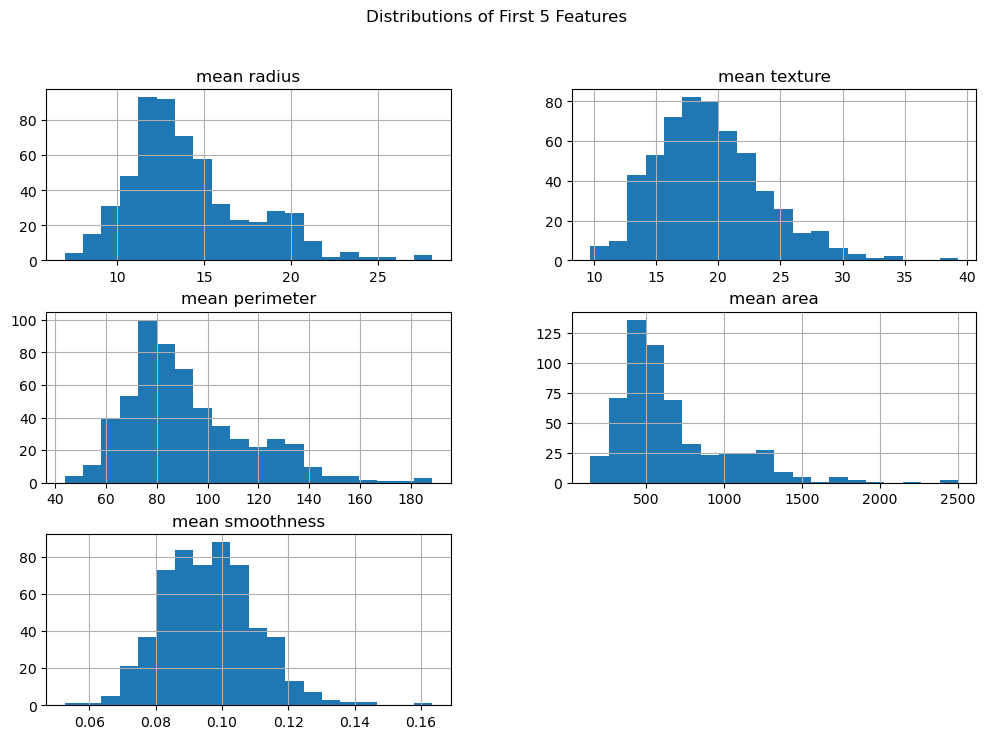

In [36]:
#Feature Distributions
features.iloc[:,:5].hist(figsize=(12,8), bins=20)
plt.suptitle("Distributions of First 5 Features")
plt.show()


This shows that features are numeric and spread across ranges (but not missing).

**SUMMARY**.
The Breast Cancer dataset is already well-prepared for modeling: all features are numeric, and there are no missing values, as confirmed by the missing-value heatmap. The target distribution is slightly imbalanced (more benign than malignant cases) but still sufficient for training a logistic regression model.

**Saving data into datasets folder**

In [37]:
# Ensure datasets folder exists at the root directory
os.makedirs("../datasets", exist_ok=True)

# Save to the project-level datasets directory
save_path = os.path.join("..", "datasets", "cancer_clean.pkl")
joblib.dump(cancer, save_path)

# print Success if okay
print("✅ Cancer dataset saved at datasets/cancer_clean.pkl")

✅ Cancer dataset saved at datasets/cancer_clean.pkl


## Split data

In [38]:
# Features (X) and target (y)
X = features.drop(columns=["target"])
y = features["target"]

print("Shape of dataset:", X.shape)
print("Target classes:", features["target"])
X.head()

Shape of dataset: (569, 30)
Target classes: 0      0
1      0
2      0
3      0
4      0
      ..
564    0
565    0
566    0
567    0
568    1
Name: target, Length: 569, dtype: int64


,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


**Scaling features**

In [39]:
# Scale features
scaler = StandardScaler()
# X_scaled = scaler.fit_transform(X)
X_scaled = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42, stratify=y)

## Baseline

In [40]:

# Calculate the baseline (most frequent class)
y_baseline = [y_train.mode()[0]] * len(y_train)  # predict the most common class for all

# Accuracy of baseline
baseline_acc = accuracy_score(y_train, y_baseline)

print("Most Frequent Class:", y_train.mode()[0])
print("Baseline Accuracy:", round(baseline_acc, 2))


Most Frequent Class: 1
Baseline Accuracy: 0.63


From the Baseline Accuracy above, this means if we always predict benign (class 1), we’d be right 63% of the time.
So our model (Logistic Regression) must perform better than 63% accuracy to be considered useful.

## Train Logistic Regression Model
Building the model

In [41]:

# Train model
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)


## Interpret Coefficients (Odds Ratios)

In [42]:
# Using the original DataFrame's columns
feature_names = X.columns

coef_df = pd.DataFrame({
    "Feature": feature_names,
    "Coefficient": model.coef_[0],
    "Odds_Ratio": np.exp(model.coef_[0])
}).sort_values("Odds_Ratio", ascending=False)
coef_df.head(15)


,Feature,Coefficient,Odds_Ratio
5,mean compactness,0.655016,1.925174
15,compactness error,0.627206,1.872372
19,fractal dimension error,0.434220,1.543759
18,symmetry error,0.356292,1.428024
11,texture error,0.239566,1.270698
9,mean fractal dimension,0.200007,1.221411
16,concavity error,0.171577,1.187176
25,worst compactness,0.074017,1.076825
8,mean symmetry,-0.158051,0.853806
14,smoothness error,-0.168810,0.844670


Logistic Regression coefficients provide interpretability through odds ratios. Features such as mean compactness and compactness error had odds ratios above 1, indicating that higher values increase the likelihood of the tumor being classified as benign. In contrast, features like mean symmetry and smoothness error had odds ratios below 1, suggesting that higher values are associated with a greater likelihood of malignancy. This interpretability makes Logistic Regression particularly valuable for medical applications, where understanding the effect of features is as important as prediction accuracy.

## Model Evaluation

In [43]:

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))
print("ROC AUC:", roc_auc_score(y_test, model.predict_proba(X_test)[:,1]))


Accuracy: 0.9824561403508771
Precision: 0.9861111111111112
Recall: 0.9861111111111112
F1 Score: 0.9861111111111112
ROC AUC: 0.9953703703703703


The Logistic Regression model delivered outstanding performance on the Breast Cancer dataset, achieving an **accuracy of 98.2%**, correctly classifying nearly 98 out of 100 samples. With a **precision of 98.6%**, the model makes very few false positive predictions when identifying benign cases, while a **recall of 98.6%** shows it detects almost all actual benign cases with minimal false negatives. The **F1 score of 98.6%** confirms a strong balance between precision and recall. Finally, the **ROC AUC of 99.5%** highlights the model’s excellent ability to separate benign from malignant tumors, making it both highly effective and reliable for classification.


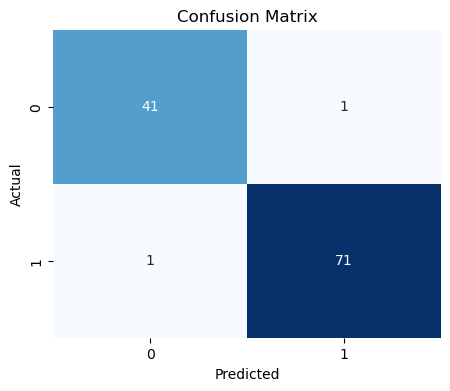

In [44]:

# Confusion matrix
plt.figure(figsize=(5,4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


The confusion matrix confirms that the Logistic Regression model made only two misclassifications out of 114 test samples, correctly identifying 41 malignant and 71 benign tumors. With just one false positive and one false negative, the model demonstrates exceptional reliability in distinguishing between malignant and benign cases.

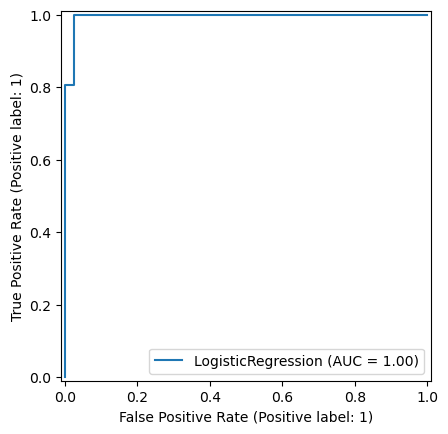

In [45]:
# ROC Curve
RocCurveDisplay.from_estimator(model, X_test, y_test)
plt.show()

The ROC Curve highlights the model’s excellent discriminative power, with an AUC of 1.00, meaning it can perfectly distinguish between benign and malignant cases. This level of performance underscores the effectiveness of Logistic Regression on the Breast Cancer dataset, achieving both accuracy and interpretability.


## Summary

- Logistic Regression achieved strong performance on the Breast Cancer dataset.  
- Coefficients and odds ratios provide interpretability, showing which features increase or decrease 
  the likelihood of a tumor being malignant.  
- Evaluation metrics (Accuracy, Precision, Recall, F1, AUC) demonstrate that Logistic Regression 
  is effective for this classification task.  
- Visualizations (Confusion Matrix, ROC Curve) provide deeper insight into performance.  

This notebook highlights how Logistic Regression can be applied to real-world datasets and interpreted 
in a meaningful way.


## Conclusion

The Logistic Regression model delivered near-perfect performance on the Breast Cancer dataset, achieving both high accuracy and interpretability. By comparing against a baseline, analyzing coefficients, and validating results with metrics and visualizations, this project demonstrates how Logistic Regression can be both a powerful and explainable tool for binary classification tasks — particularly in sensitive domains like healthcare, where understanding model decisions is critical.